In [41]:
# Lab Customer Analysis Round 3

In [42]:
import pandas as pd
import numpy as np

In [43]:
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 50)

In [44]:
data = pd.read_csv('marketing_customer_analysis.csv')

In [45]:
# show data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [46]:
# describe the data
data.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [47]:
# Show a plot of the total number of responses.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

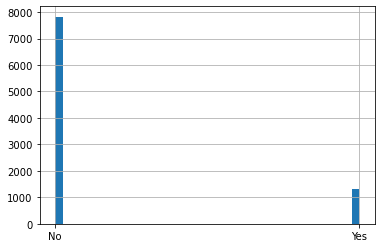

In [48]:
data['Response'].hist(bins=40)
plt.show()

In [49]:
# Show a plot of the response rate by the sales channel

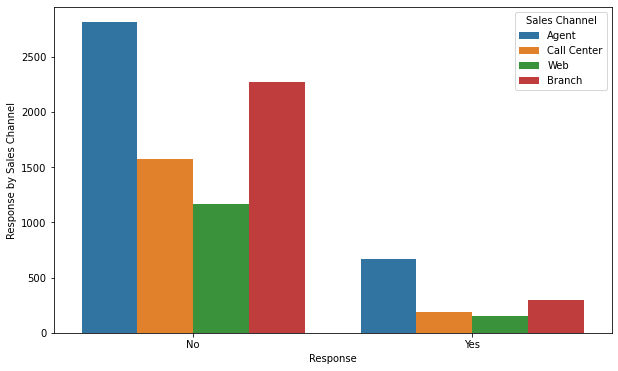

In [50]:
plt.figure(figsize=(10,6))
sns.countplot('Response', hue='Sales Channel', data=data)
plt.ylabel('Response by Sales Channel')
plt.show()

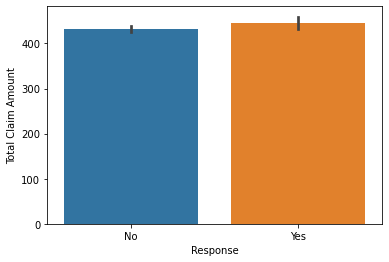

In [51]:
# Show a plot of the response rate by the total claim amountplt.figure(figsize=(10,6))
sns.barplot(x="Response", y="Total Claim Amount", data=data)
plt.show()

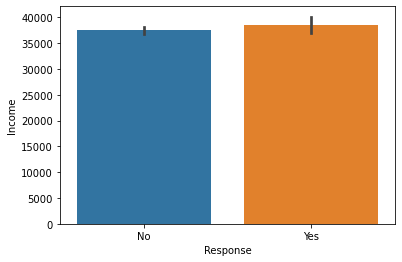

In [52]:
# Show a plot of the response rate by income.
sns.barplot(x="Response", y="Income", data=data)
plt.show()

In [53]:
# ex = data.plot.scatter(x='Response', y='Income')

In [54]:
# Lab Customer Analysis Round 4

In [55]:
# Check the data types of the columns. Get the numeric data into dataframe called numerical and categorical columns 
# in a dataframe called categoricals. (You can use np.number and np.object to select the numerical data types and 
# categorical data types respectively)

In [56]:
numerical = data.select_dtypes(include=[np.number])
numerical.head()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879


In [57]:
categorical = data.select_dtypes(include=[np.object])
categorical.head()

,Customer,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


<AxesSubplot:ylabel='Count'>

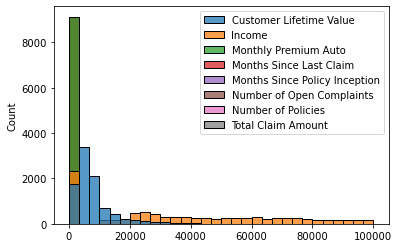

In [58]:
sns.histplot(numerical, bins=30)

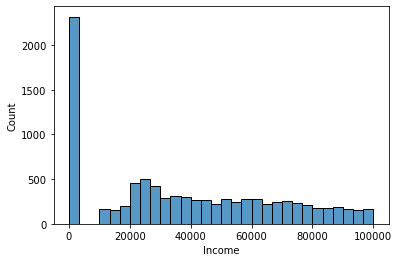

In [59]:
sns.histplot(numericals['Income'],bins=30)
plt.show()

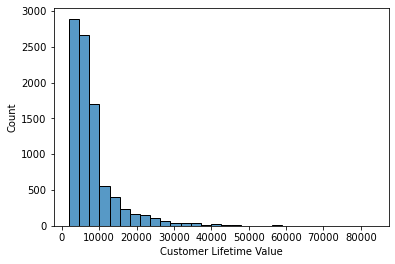

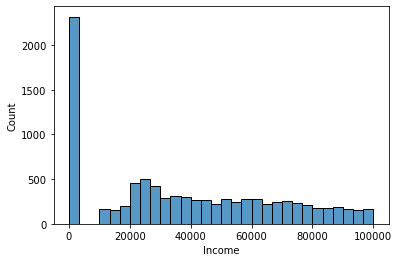

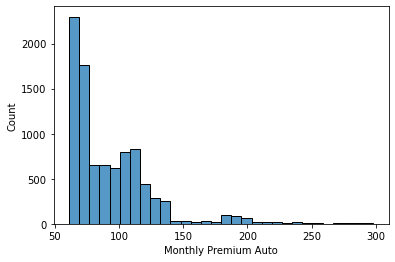

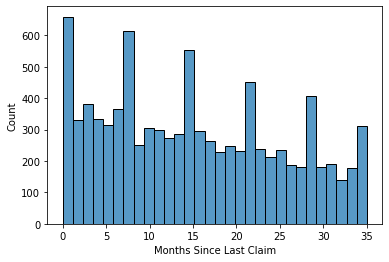

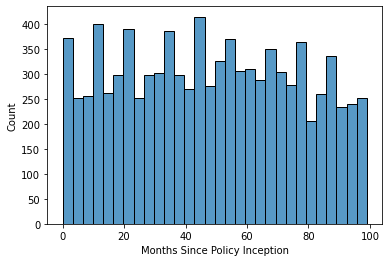

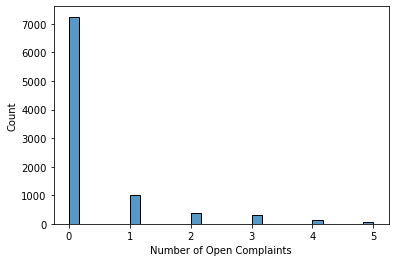

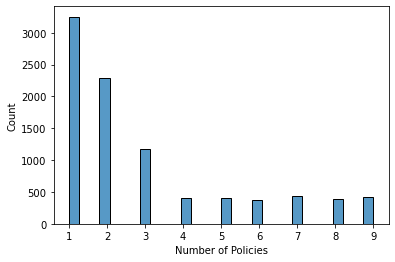

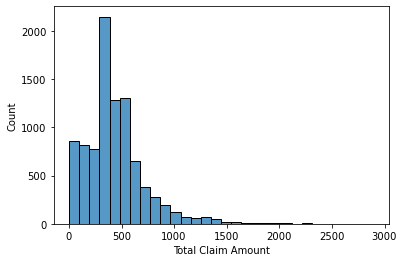

In [60]:
for i in range(numerical.shape[1]):
    sns.histplot(numerical[numerical.columns[i]], bins=30)
    plt.show()

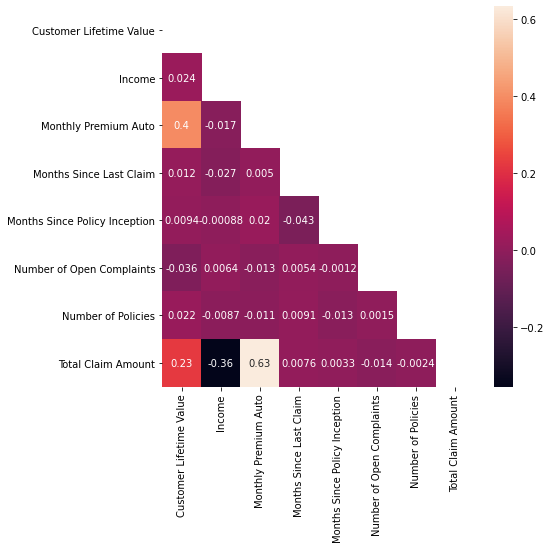

In [61]:
correlations_matrix = numerical.corr()
mask = np.zeros_like(correlations_matrix)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(7, 7))
ax = sns.heatmap(correlations_matrix, mask=mask, annot=True)
plt.show()

In [62]:
# As there is no correlation greater than 0.9 I don't drop a column. 

In [63]:
# Lab 5 

In [65]:
# X-y split.
from sklearn.model_selection import train_test_split

In [66]:
Y = data['Total Claim Amount']

In [67]:
data = data.drop(['Total Claim Amount'], axis = 1)

In [ ]:
# Normalization of numerical data

In [68]:
from sklearn.preprocessing import Normalizer

In [69]:
transformer = Normalizer().fit(numerical)
x_normalized = transformer.transform(numerical)
print(x_normalized.shape)
pd.DataFrame(x_normalized)

(9134, 8)


,0,1,2,3,4,5,6,7
0,0.049048,0.998772,0.001225,0.000568,0.000089,0.000000,0.000018,0.006830
1,0.987006,0.000000,0.013293,0.001838,0.005939,0.000000,0.001131,0.160005
2,0.255478,0.966747,0.002141,0.000357,0.000753,0.000000,0.000040,0.011230
3,0.997473,0.000000,0.013829,0.002348,0.008480,0.000000,0.000913,0.069128
4,0.064055,0.997940,0.001662,0.000273,0.001002,0.000000,0.000023,0.003145
...,...,...,...,...,...,...,...,...
9129,0.309385,0.950932,0.000965,0.000238,0.001176,0.000000,0.000026,0.002620
9130,0.141858,0.989727,0.003619,0.000641,0.001283,0.000000,0.000046,0.017372
9131,0.995277,0.000000,0.010363,0.001097,0.004511,0.000366,0.000244,0.096406
9132,0.324247,0.945493,0.004137,0.001465,0.000129,0.000000,0.000129,0.029786
